# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Вычислим градиент $L(w)$ для одного объекта. Для этого рассмотрим частную производную $\frac{\partial}{\partial w_{j} } L(w) = 2 (<x_{i}, w> - y_{i}) x_{i j} + \frac{2}{C} w_{j}$. Так мы получили $j$-ю компоненту градиента. Далее, суммируя для n объектов, получаем итоговую формулу градиента.
$$w_{new} = w_{old} - \alpha \cdot \left( \frac{2}{n} \sum\limits_{i=1}^{n}  (<x_{j_{i}} 
,w_{old}> - y_{j_{i}}) x_{j_{i}} + \frac{2}{C} w_{old} \right) $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Поступаем аналогично случаю линейной регрессии, только на этот раз производная $\frac{\partial}{\partial w_{j} } L(w) = (\sigma(<x_{i} ,w>) - y_{i}) x_{i j} + \frac{2}{C} w_{j}$. 
$$w_{new} = w_{old} - \alpha \cdot \left( \frac{1}{n} \sum\limits_{i=1}^{n}  (\sigma(<x_{j_{i}} 
,w_{old}>) - y_{j_{i}}) x_{j_{i}} + \frac{2}{C} w_{old} \right)$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
1) Поскольку градиент $L(w)$ имеет вид $\nabla_{w} L(w) = \frac{2}{N} X^{T} X w - \frac{2}{N} X^{T} y$, то нетрудно видеть, что $\frac{\partial^{2}}{\partial w_{i} w_{j}} L(w) = \frac{2}{N} \left(X^{T} X \right)_{i j}$, то есть Гессиан равен $\frac{2}{N} X^{T}X$. Поскольку ранг $X$ максимален и строк не меньше чем столбцов, то (из линейной алгебры) $\forall \ w \neq 0$, $\; X w \neq 0$, а значит $\forall \ w \neq 0$, $\; w^{T} \frac{2}{N} X^{T} X w = \frac{2}{N} \| X w \|^{2} \neq 0$, поэтому $X^{T} X$ положительно определена.    

2) В данном случае градиент будет иметь вид $\nabla_{w} L(w) = \frac{2}{N} X^{T} X w - \frac{2}{N} X^{T} y + \frac{2}{C} w$; приравнивая его к нулю, получаем: $w = \left( X^{T} X + \frac{N}{C} E \right)^{-1} X^{T} y$. Регуляризация помогает, позволяя сделать матрицу $\left( X^{T} X + \frac{N}{C} E \right)$ обратимой. 

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Можно переписать формулу матожидания следующим образом: $E(L|x_{i}) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i))$. Найдём минимум этой функции по $a(x_{i})$: $\frac{\partial }{\partial a(x_{i})} E(L|x_{i}) = \frac{a(x_{1}) - p(y_i = 1 |x_i)}{a(x_{i}) \cdot (1 - a(x_{i}))}$. Поскольку $a(x_{i}) \in [0; 1]$, то из вида производной видно, что на данном промежутке матожидание достигает минимума при $a(x_{i}) = p(y_i = 1 |x_i )$.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Не обязательно. Мы вводим регуляризацию, чтобы уменьшить размеры весов, таким образом избежав неустойчивости (когда один признак имеет гораздо большее влияние на ответ). Но "фиктивный" признак х_0 никогда не меняется и всегда одинаково учитывается в ответе.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [7]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [8]:
#%%pycodestyle
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if(shuffle):
        ind = np.random.permutation(y.size)
    else:
        ind = range(y.size)
    X_batch = np.ndarray(batch_size)
    y_batch = np.ndarray(batch_size)
    for i in range(y.size // batch_size):
        X_batch = X[ind[i:i + batch_size:], ::]
        y_batch = y[ind[i:i + batch_size:]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [1]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    ## Your code Here
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            loss = np.linalg.norm((X_batch @ self.weights).ravel() - y_batch, ord=2) ** 2 / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
        if(self.model_type == 'log_reg'):
            loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type == 'lin_reg'):
            loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
        if(self.model_type == 'log_reg'):
            loss_grad = (1 / np.shape(y_batch)[0]) * ((X_batch.T) @ (sigmoid(X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
        loss_grad[0] -= (2 / self.C) * self.weights[0]
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y, batch_size=10):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.random.random_sample(np.shape(X)[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                X_batch = np.concatenate((np.ones([X_batch.shape[0], 1]), X_batch), axis=1)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X, treshold=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        new_X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        if(self.model_type == 'lin_reg'):
            y_res = (new_X @ self.weights.reshape(-1, 1)).ravel()
        if(self.model_type == 'log_reg'):
            y_res = (sigmoid(new_X @ self.weights.reshape(-1, 1))).ravel()
        y_hat = (y_res > treshold).astype(int)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [219]:
def plot_decision_boundary(X, y):
    ## Your code Here
    x = [-4., 8.]
    sepline = plt.subplot()
    
    my_model = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=100, model_type='lin_reg')
    my_model.fit(X, y)
    w0 = my_model.weights[0]
    w1 = my_model.weights[1]
    w2 = my_model.weights[2]
    b = (0.5 - w0) / w2
    a = -w1 / w2
    print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)
    sepline.plot(x, [a * i + b for i in x], color='green')
    
    my_model = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=200, model_type='lin_reg')
    my_model.fit(X, y)
    w0 = my_model.weights[0]
    w1 = my_model.weights[1]
    w2 = my_model.weights[2]
    b = (0.5 - w0) / w2
    a = -w1 / w2
    print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)
    sepline.plot(x, [a * i + b for i in x], color='lightgreen')
    
    my_model = MySGDClassifier(batch_generator, C = 4, alpha=0.05, max_epoch=50, model_type='log_reg')
    my_model.fit(X, y)
    w0 = my_model.weights[0]
    w1 = my_model.weights[1]
    w2 = my_model.weights[2]
    b = (0.5 - w0) / w2
    a = -w1 / w2
    print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)
    sepline.plot(x, [a * i + b for i in x], color='blue')
    
    my_model = MySGDClassifier(batch_generator, C = 4, alpha=0.01, max_epoch=100, model_type='log_reg')
    my_model.fit(X, y)
    w0 = my_model.weights[0]
    w1 = my_model.weights[1]
    w2 = my_model.weights[2]
    b = (0.5 - w0) / w2
    a = -w1 / w2
    print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)
    sepline.plot(x, [a * i + b for i in x], color='indigo')

w0 =  0.03143494245925387 w1 =  0.10198054805579806 w2 =  -0.08799518048690255
w0 =  0.08050130216085294 w1 =  0.08129419501881846 w2 =  -0.10315599055503673
w0 =  -1.7534658514672188 w1 =  0.517397238720472 w2 =  -0.2896761657764732
w0 =  -1.508025648497021 w1 =  0.4848378308091237 w2 =  -0.21887336775169255


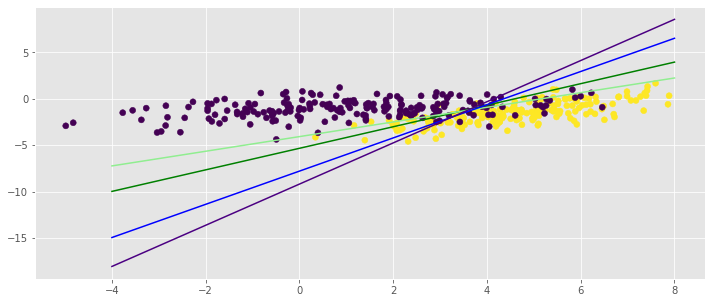

In [220]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


# plot_decision_boundary(your_model)
plot_decision_boundary(X, y)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [7]:
from sklearn.datasets import make_classification

In [8]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

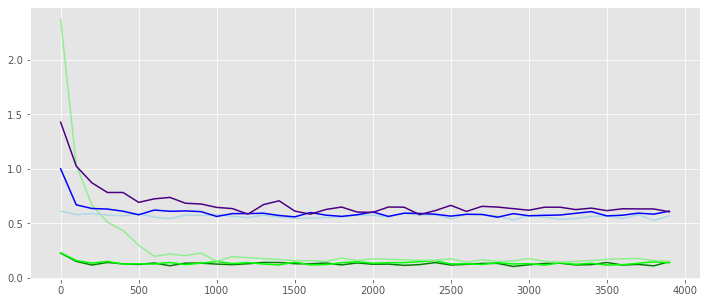

In [195]:
## Your Code Here

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.01, max_epoch=100, model_type='lin_reg')
my_model.fit(X, y, batch_size=10)

graph = plt.subplot()
max_steps = np.shape(my_model.errors_log['loss'])[0]
x = np.arange(0, max_steps, 100)

graph.plot(x, [np.mean(my_model.errors_log['loss'][i:i + 100:1]) for i in x], color="green")

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.005, max_epoch=100, model_type='lin_reg')
my_model.fit(X, y, batch_size=10)
graph.plot(x, [np.asarray(my_model.errors_log['loss'][i:i + 100:1]).mean() for i in x], color="lime")

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.0001, max_epoch=100, model_type='lin_reg')
my_model.fit(X, y, batch_size=10)
graph.plot(x, [np.asarray(my_model.errors_log['loss'][i:i + 100:1]).mean() for i in x], color="lightgreen")

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.05, max_epoch=100, model_type='log_reg')
my_model.fit(X, y, batch_size=10)
graph.plot(x, [np.asarray(my_model.errors_log['loss'][i:i + 100:1]).mean() for i in x], color="lightblue")

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.01, max_epoch=100, model_type='log_reg')
my_model.fit(X, y, batch_size=10)
graph.plot(x, [np.asarray(my_model.errors_log['loss'][i:i + 100:1]).mean() for i in x], color="blue")

my_model = MySGDClassifier(batch_generator, C = 1, alpha=0.001, max_epoch=100, model_type='log_reg')
my_model.fit(X, y, batch_size=10)
graph.plot(x, [np.asarray(my_model.errors_log['loss'][i:i + 100:1]).mean() for i in x], color="indigo")


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [350]:
## Your Code Here

x = np.arange(np.logspace(3, -3, 10).size)

w1 = []
for C in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator, C, alpha=0.005, max_epoch=100, model_type='lin_reg')
    my_model.fit(X, y)
    w1.append(my_model.weights.mean())

w2 = []
for C in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator, C, alpha=0.05, max_epoch=100, model_type='log_reg')
    my_model.fit(X, y)
    w2.append(my_model.weights.mean())

<ipython-input-116-8d54fd352bbe>:40: RuntimeWarning: overflow encountered in double_scalars
  loss = np.linalg.norm((X_batch @ self.weights).ravel() - y_batch, ord=2) ** 2 / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: overflow encountered in add
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: invalid value encountered in matmul
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
<ipython-input-116-8d54fd352bbe>:64: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad
<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: overflow encountered in true_divi

<ipython-input-355-55479e571511>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.round(np.logspace(3, -3, 10), 3))


[Text(-1.0, 0, '1000.0'),
 Text(0.0, 0, '215.443'),
 Text(1.0, 0, '46.416'),
 Text(2.0, 0, '10.0'),
 Text(3.0, 0, '2.154'),
 Text(4.0, 0, '0.464'),
 Text(5.0, 0, '0.1'),
 Text(6.0, 0, '0.022'),
 Text(7.0, 0, '0.005'),
 Text(8.0, 0, '0.001')]

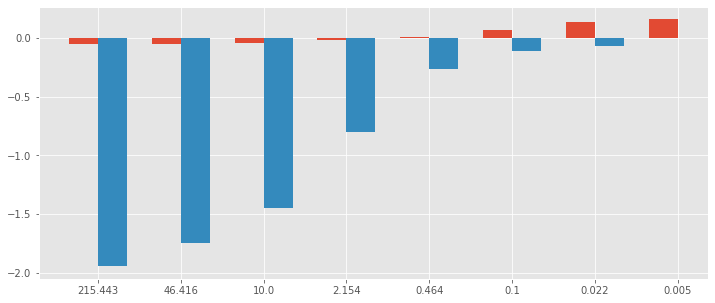

In [355]:
graph = plt.subplot()
width = 0.35
graph.bar(x - width/2, w1, width, label='lin_reg')
graph.bar(x + width/2, w2, width, label='log_reg')
graph.set_xticklabels(np.round(np.logspace(3, -3, 10), 3))


Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [11]:
doc_to_title = {}
with open('docs_titles.tsv', encoding="utf8") as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [13]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [15]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 0.28851817,  0.64985075,  0.34754853, ...,  0.40832322,
        -0.2798612 , -0.25235498],
       [ 1.83850779,  2.06407761,  2.42519734, ...,  0.40832322,
         0.44747927,  0.49035139],
       [-0.48647664, -0.29296716, -0.17186368, ..., -0.30881898,
        -0.2798612 , -0.25235498],
       ...,
       [-1.26147145, -1.23578506, -1.21068809, ..., -1.02596118,
        -1.00720167, -0.99506135],
       [ 1.06351298, -0.29296716, -0.69127588, ..., -0.30881898,
        -0.2798612 , -0.25235498],
       [-0.09897923, -0.29296716, -0.17186368, ..., -0.30881898,
        -0.2798612 , -0.25235498]])

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def testAccuracy(X, y, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=10, treshold=0.5, metric='f1', n_splits=3):
    kf = KFold(n_splits)
    my_clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type=model_type)
    tempAccuracy = []
    kfSplit = kf.split(X)
    for train_index, test_index in kfSplit:
        my_clf.fit(X[train_index], y[train_index], batch_size=batch_size)
        if(metric == 'f1'):
            tempAccuracy.append(f1_score(y[test_index], my_clf.predict(X[test_index], treshold=treshold)))
        if(metric == 'mean_accuracy'):
            tempAccuracy.append(accuracy_score(y[test_index], my_clf.predict(X[test_index], treshold=treshold)))

    return np.asarray(tempAccuracy).mean()

<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: overflow encountered in matmul
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
<ipython-input-116-8d54fd352bbe>:40: RuntimeWarning: invalid value encountered in matmul
  loss = np.linalg.norm((X_batch @ self.weights).ravel() - y_batch, ord=2) ** 2 / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:64: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad
<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: invalid value encountered in matmul
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
<ipython-input-289-ef2376d8f5f9>:11: RuntimeWarning: invalid value encountered in doub

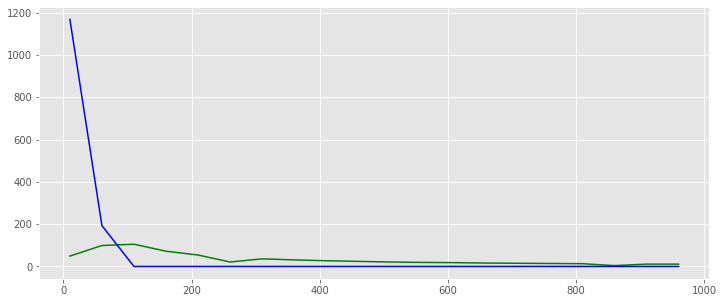

In [289]:
b_sizes = np.arange(10, 1001, 50)
eps = 0.0001
conv_lin = []
for i in b_sizes:
    my_model = MySGDClassifier(batch_generator, C = 4, alpha=0.01, max_epoch=100, model_type='lin_reg')
    my_model.fit(X_train, y_train, batch_size=i)
    max_steps = np.shape(my_model.errors_log['loss'])[0]
    x = np.arange(0, max_steps, 100)
    errors = [np.mean(my_model.errors_log['loss'][i:i + 100:1]) for i in x]
    j = 0
    while j + 1 < np.shape(errors)[0] and np.abs(errors[j] - errors[j + 1]) >= eps:
        j += 1
    conv_lin.append(j)
    
conv_log = []
for i in b_sizes:
    my_model = MySGDClassifier(batch_generator, C = 4, alpha=0.01, max_epoch=100, model_type='log_reg')
    my_model.fit(X_train, y_train, batch_size=i)
    max_steps = np.shape(my_model.errors_log['loss'])[0]
    x = np.arange(0, max_steps, 100)
    errors = [np.mean(my_model.errors_log['loss'][i:i + 100:1]) for i in x]
    j = 0
    while j + 1 < np.shape(errors)[0] and np.abs(errors[j] - errors[j + 1]) >= eps:
        j += 1
    conv_log.append(j)

plt.plot(b_sizes, conv_lin, color='green')
plt.plot(b_sizes, conv_log, color='blue')

In [20]:
lin_batch_size = 400
log_batch_size = 200

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [305]:
resLinC = []
cs = np.arange(0.5, 5, 0.5)
for i in cs:
    resLinC.append(testAccuracy(X_train, y_train, max_epoch=100, C = i, alpha=0.01, model_type='lin_reg', batch_size=lin_batch_size, metric='f1', n_splits=4))
optC = cs[np.argmax(resLinC)]
print(optC)

1.0


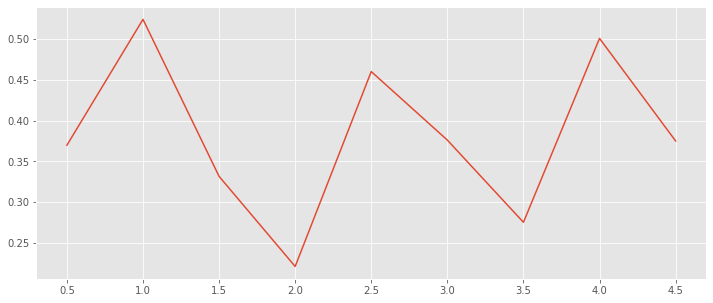

In [306]:
plt.plot(cs, resLinC)

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


3.5


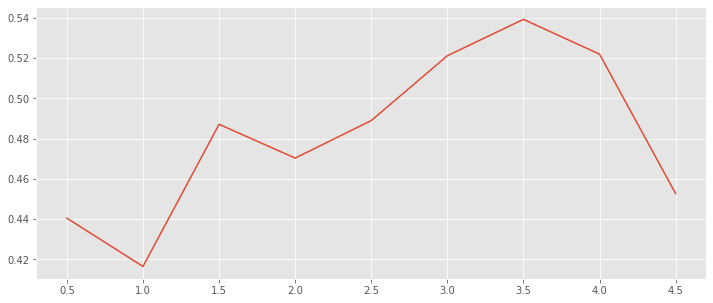

In [308]:
resLogC = []
for i in np.arange(0.5, 5, 0.5):
    resLogC.append(testAccuracy(X_train, y_train, max_epoch=50, C = i, alpha=0.01, model_type='log_reg', batch_size=log_batch_size, metric='f1', n_splits=4))
optLogC = optC = cs[np.argmax(resLogC)]
plt.plot(np.arange(0.5, 5, 0.5), resLogC)
print(optLogC)

<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: overflow encountered in matmul
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C
<ipython-input-116-8d54fd352bbe>:40: RuntimeWarning: invalid value encountered in matmul
  loss = np.linalg.norm((X_batch @ self.weights).ravel() - y_batch, ord=2) ** 2 / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:53: RuntimeWarning: invalid value encountered in matmul
  loss_grad = (2 / np.shape(y_batch)[0]) * ((X_batch.T) @ ((X_batch @ ((self.weights).reshape(-1, 1))).ravel() - y_batch).reshape(-1, 1)).ravel() + (2 * self.weights) / self.C


0.001


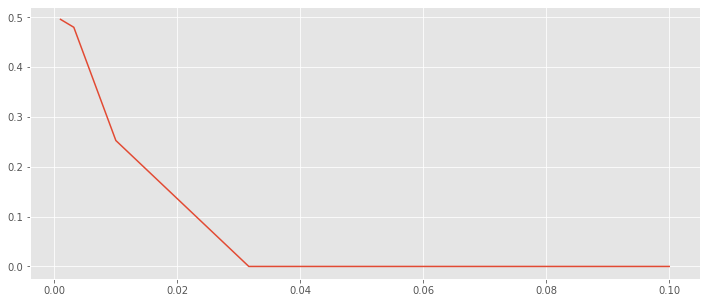

In [310]:
resLinAlpha = []
for a in np.logspace(-1, -3, 5):
    resLinAlpha.append(testAccuracy(X_train, y_train, max_epoch=100, C=optC, alpha=a, model_type='lin_reg', batch_size=lin_batch_size, metric='f1', n_splits=4))
optAlpha = np.logspace(-1, -3, 5)[np.asarray(resLinAlpha).argmax()]
plt.plot(np.logspace(-1, -3, 5), resLinAlpha)
print(optAlpha)

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


0.0005623413251903491


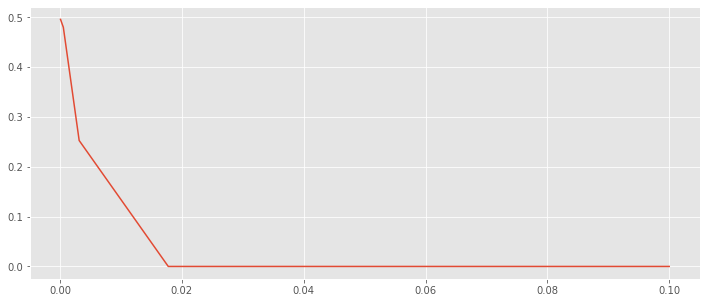

In [319]:
resLogAlpha = []
for a in np.logspace(-1, -4, 5):
    resLogAlpha.append(testAccuracy(X_train, y_train, max_epoch=50, C=optLogC, alpha=a, model_type='log_reg', batch_size=log_batch_size, metric='f1', n_splits=4))
optLogAlpha = np.logspace(-1, -4, 5)[np.asarray(resLogAlpha).argmin()]
plt.plot(np.logspace(-1, -4, 5), resLinAlpha)
print(optLogAlpha)

800


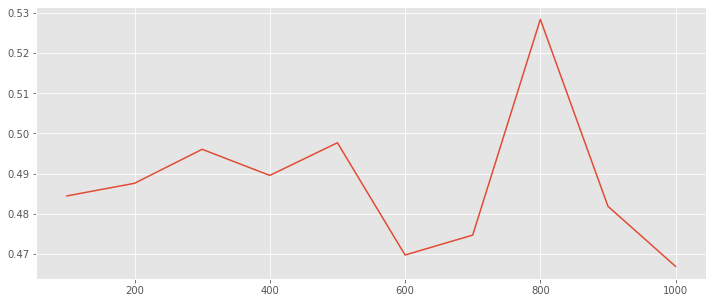

In [313]:
resLinMax_Epoch = []
for me in np.arange(100, 1001, 100):
    resLinMax_Epoch.append(testAccuracy(X_train, y_train, max_epoch=me, C=optC, alpha=optAlpha, model_type='lin_reg', batch_size=lin_batch_size, metric='f1', n_splits=4))
optMax_Epoch = np.arange(100, 1001, 100)[np.asarray(resLinMax_Epoch).argmax()]
plt.plot(np.arange(100, 1001, 100), resLinMax_Epoch)
print(optMax_Epoch)

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


800


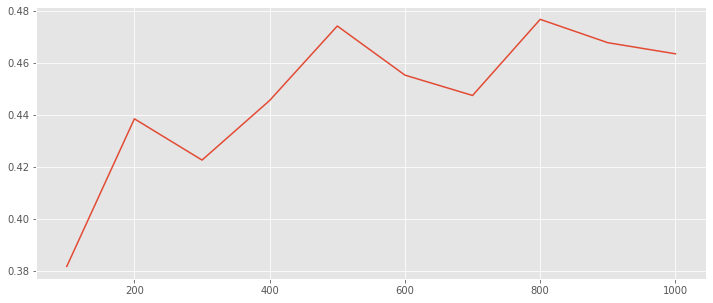

In [348]:
resLogMax_Epoch = []
for me in np.arange(100, 1001, 100):
    resLogMax_Epoch.append(testAccuracy(X_train, y_train, max_epoch=me, C=optLogC, alpha=optLogAlpha, model_type='log_reg', batch_size=log_batch_size, metric='f1', n_splits=4))
optLogMax_Epoch = np.arange(100, 1001, 100)[np.asarray(resLogMax_Epoch).argmax()]
print(optLogMax_Epoch)
plt.plot(np.arange(100, 1001, 100), resLogMax_Epoch)

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


110


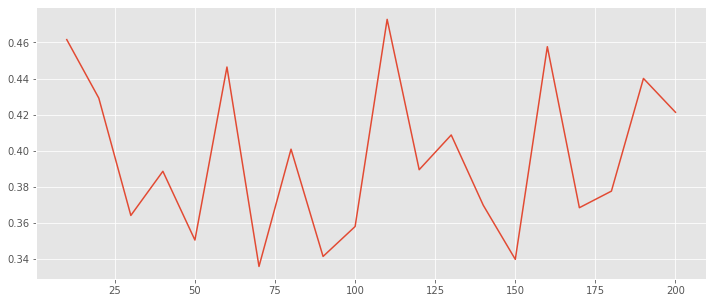

In [347]:
resLogMax_Epoch = []
for me in np.arange(10, 201, 10):
    resLogMax_Epoch.append(testAccuracy(X_train, y_train, max_epoch=me, C=optLogC, alpha=optLogAlpha, model_type='log_reg', batch_size=log_batch_size, metric='f1', n_splits=4))
optLogMax_Epoch = np.arange(10, 201, 10)[np.argmax(resLogMax_Epoch)]
print(optLogMax_Epoch)
plt.plot(np.arange(10, 201, 10), resLogMax_Epoch)

0.30000000000000004


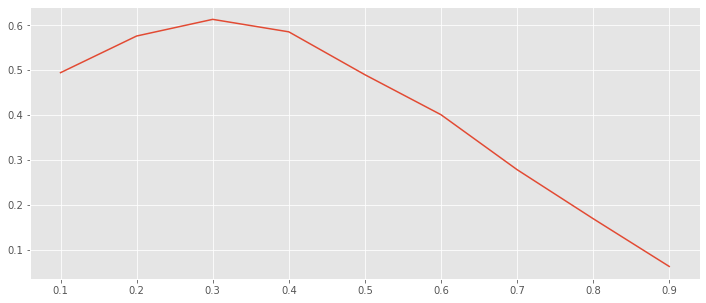

In [323]:
resLinTreshold = []
for tr in np.arange(0.1, 1, 0.1):
    resLinTreshold.append(testAccuracy(X_train, y_train, max_epoch=optMax_Epoch, C=optC, alpha=optAlpha, model_type='lin_reg', batch_size=lin_batch_size, treshold=tr, metric='f1', n_splits=4))
optLinTreshold = np.arange(0.1, 1, 0.1)[np.argmax(resLinTreshold)]
plt.plot(np.arange(0.1, 1, 0.1), resLinTreshold)
print(optLinTreshold)

<ipython-input-1-af3435e14123>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-1-af3435e14123>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


0.4


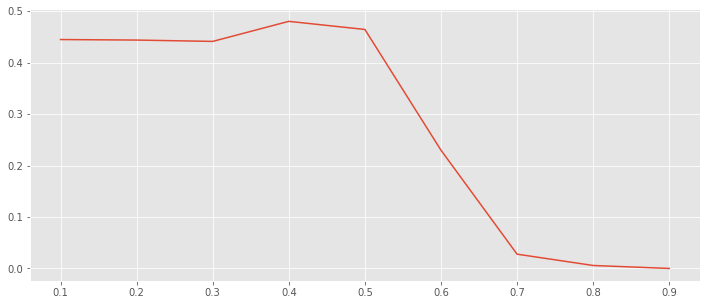

In [21]:
resLogTreshold = []
for tr in np.arange(0.1, 1, 0.1):
    resLogTreshold.append(testAccuracy(X_train, y_train, max_epoch=optLogMax_Epoch, C=optLogC, alpha=optLogAlpha, model_type='log_reg', batch_size=log_batch_size, treshold=tr, metric='f1', n_splits=4))
optLogTreshold = np.arange(0.1, 1, 0.1)[np.asarray(resLogTreshold).argmax()]
plt.plot(np.arange(0.1, 1, 0.1), resLogTreshold)
print(optLogTreshold)

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


0.34


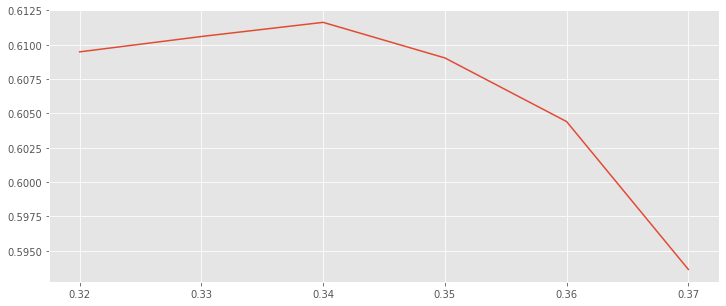

In [373]:
resLogTreshold = []
for tr in np.arange(0.32, 0.38, 0.01):
    resLogTreshold.append(testAccuracy(X_train, y_train, max_epoch=optLogMax_Epoch, C=optLogC, alpha=optLogAlpha, model_type='log_reg', batch_size=log_batch_size, treshold=tr, metric='f1', n_splits=4))
optLogTreshold1 = np.arange(0.32, 0.38, 0.01)[np.asarray(resLogTreshold).argmax()]
plt.plot(np.arange(0.32, 0.38, 0.01), resLogTreshold)
print(optLogTreshold1)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [333]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
    
X_test = []
X_id = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        X_id.append(doc_id)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_id = np.array(X_id)
X_test = np.array(X_test)
#y_train = np.array(y_train)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape, X_id.shape)

(16627, 15) (16627,) (16627,)


In [376]:
scaler = StandardScaler()
scaler.fit(X_test)
scaler.transform(X_test)

array([[-0.09960999,  0.17383214, -0.16130939, ..., -0.28701374,
        -0.25952987, -0.23333124],
       [ 0.62919761,  0.17383214,  0.33381545, ...,  0.41529347,
         0.45125965,  0.48738185],
       [ 0.9936014 ,  1.08130689,  1.32406513, ...,  1.81990788,
         1.87283869,  1.92880802],
       ...,
       [ 0.62919761,  0.62756952,  0.82894029, ...,  0.41529347,
         0.45125965,  0.48738185],
       [-0.09960999,  0.17383214,  0.33381545, ...,  0.41529347,
         0.45125965,  0.48738185],
       [ 3.90883178,  5.16494323,  5.7801887 , ...,  0.41529347,
         0.45125965,  0.48738185]])

In [343]:
#old submission
my_clf = MySGDClassifier(batch_generator, max_epoch=optMax_Epoch, C=optC, alpha=optAlpha, model_type='lin_reg')
my_clf.fit(X_train, y_train, batch_size=lin_batch_size)
y_res = my_clf.predict(X_test, treshold=optLinTreshold)
print(np.shape(y_res))

(16627,)


In [378]:
#new submission
my_clf = MySGDClassifier(batch_generator, max_epoch=optLogMax_Epoch, C=optLogC, alpha=optLogAlpha, model_type='log_reg')
my_clf.fit(X_train, y_train, batch_size=log_batch_size)
y_res = my_clf.predict(X_test, treshold=optLogTreshold1)
print(np.shape(y_res))

<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: divide by zero encountered in log
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C
<ipython-input-116-8d54fd352bbe>:42: RuntimeWarning: invalid value encountered in matmul
  loss = -((np.log(sigmoid(X_batch @ self.weights))) @ y_batch.reshape(-1, 1) + (np.log(1 - sigmoid(X_batch @ self.weights))) @ (1 - y_batch).reshape(-1, 1)) / np.shape(y_batch)[0] + (np.linalg.norm(self.weights[1::]) ** 2) / self.C


(16627,)


In [380]:
answer = pd.DataFrame({'pair_id': np.asarray(test_data['pair_id']), 'target': y_res.astype(int)})
answer = answer.set_index(['pair_id'])
answer.to_csv('subm2.csv')
#kaggle: Syromyatnikov_A

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***